<a href="https://colab.research.google.com/github/dexweng/Statistics/blob/master/Distribution_of_one_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Distribution Center**

**Mean(平均數)**

In [1]:
import numpy as np
x = np.arange(10)
x.mean() #or you can get the same result from np.mean(x)

4.5

In [2]:
#如果數字當中有NaN 我們可以透過另一個辦法來獲得mean
x_NaN = np.hstack((x, np.nan)) #append NaN
np.nanmean(x_NaN)

4.5

**Median(中位數)**

In [3]:
x = np.arange(10)
np.median(x)

4.5

**Mode(眾數)**

In [8]:
from scipy import stats
data = [1, 5, 5, 5, 9]

print(stats.mode(data)[0])

[5]


**Geometric Mean(幾何平均數)**

In [9]:
x = np.arange(1, 101)
stats.gmean(x)

37.992689344834304

# **Qualifying Variability**

**Range**

the difference between the highest and the lowest data value.

In [11]:
x = np.arange(1, 101)
range = np.ptp(x)
range

#ptp stands for "peak-to-peak"

99

**Percentiles**

percentile are just the inverse of the CDF, and give the value below which a percentage of the data values occur.

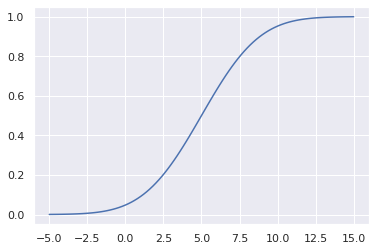

In [14]:
#Let's creat the CDF first

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#Create the frozen distribution, with the mean of 5 and the standard deviation of 3
myDF = stats.norm(5, 3)

x = np.linspace(-5, 15, 101)

#Calculate the corresponding CDF
y = myDF.cdf(x)

#just for the aesthetics
sns.set()

plt.plot(x, y)
plt.show()

The 2.5th is -0.88 and the 97.5th is 10.88, which includes 95% of the data
The outcome of integration of PDF from -0.88 to 10.88 is 0.95


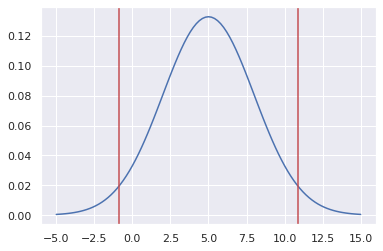

In [24]:
#Let's find the range which includes 95% of the data
#one has to find the 2.5th and the 97.5th percentile of the distribution above

#PPF answers the question like "Given a certain probability, what is the corresponding input value for the CDF?"
lower_percentile = myDF.ppf(0.025)
upper_percentile = myDF.ppf(0.975)

print("The 2.5th is {lower} and the 97.5th is {upper}, which includes 95% of the data".format(lower = round(lower_percentile, 3), upper = round(upper_percentile, 3)))

#To experiment if our outcome is correct or not by calculating the areas of PDF(Probability Density Function) from x = 2.5th percentile to x = 97.5th percentile
from scipy import integrate
import math

#Specify the mean and the standard deviation
mu = 5
sigma = 3

#Normal Distribution function --> 上網查常態分佈就能夠找到他機率密度函數的數學式
def f(x):
  son = sigma * math.sqrt(2 * math.pi)
  element2 = math.pow(math.e, (math.pow((x - mu) ,2) * -1) / (2 * math.pow(sigma, 2)))
  return (1 / son) * element2

v, err = integrate.quad(f, lower_percentile, upper_percentile)
print("The outcome of integration of PDF from -0.88 to 10.88 is", round(v, 3))

#Plotting the area
x1 = np.linspace(-5, 15, 101)
y1 = myDF.pdf(x1)
plt.plot(x1, y1)
plt.axvline(x = lower_percentile, color = "r")
plt.axvline(x = upper_percentile, color = "r")
plt.show()

**Standard Deviation and Variance**

In [30]:
import math

#苦工
def variance(x):
  output = 0
  mean = np.mean(x)
  for i in x:
    output += math.pow((i - mean), 2)
  return output / (len(x) - 1)

def standard_deviation(x):
  return math.sqrt(variance(x))

print("mean", np.mean(x))
print("variance", variance(np.linspace(0, 50, 100)))
print("standard deviation", standard_deviation(np.linspace(0, 50, 100)))

mean 5.000000000000001
variance 214.68897731524
standard deviation 14.652268674687889


In [29]:
#用numpy方法

import numpy as np

#ddof stands for degree of freedom
np.std(x, ddof = 0)

5.830951894845301

**Standard Error**

the Standard Error is the estimate of the standard deviation of a coefficient.

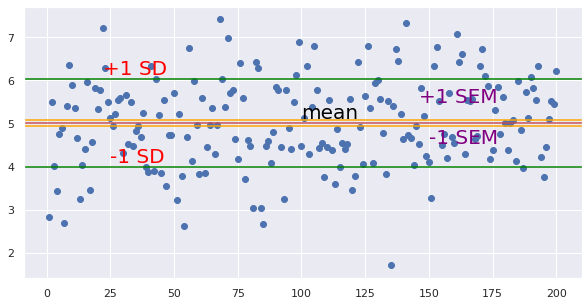

In [65]:
#set random data
data = np.random.randn(200) + 5

#SEM
sem = np.std(data, ddof = 1) / math.sqrt(len(data))

#Plotting the random data
plt.figure(figsize = (10, 5))
plt.scatter(x = np.arange(1, 201), y = data)

#Plotting the lines of mean
plt.axhline(y = np.mean(data), color = "r")
plt.text(x = 100, y = np.mean(data) + 0.1, s = "mean", fontsize = 20, color = "black")

#Plotting the lines of standard deviation
plt.axhline(y = np.mean(data) - np.std(data), color = "green")
plt.text(x = 22, y = np.mean(data) + np.std(data) + 0.1, s = "+1 SD", fontsize = 20, color = "red")
plt.axhline(y = np.mean(data) + np.std(data), color = "green")
plt.text(x = 25, y = np.mean(data) - np.std(data) + 0.1, s = "-1 SD", fontsize = 20, color = "red")

#Plotting the lines of SEM
plt.axhline(y = np.mean(data) + sem, color = "orange")
plt.text(x = 146, y = np.mean(data) + sem + 0.4, s ="+1 SEM" , color = "purple", fontsize = 20)
plt.axhline(y = np.mean(data) - sem, color = "orange")
plt.text(x = 150, y = np.mean(data) - sem - 0.4, s ="-1 SEM" , color = "purple", fontsize = 20)


plt.show()

One hundred random points from a normal distribution about 5. The sample mean is very close to the real mean.

The standard deviation of the mean, or standard error of the mean, is ten times smaller than the standard deviation of the samples.

**Confidence Intervals**

The a% confidence interval(CI) reports the range that contains the true values for the parameter with a likelihood of a%

In [68]:
#If the sampling distribution is symmetrical and unimodal
#it will often be possible to approximate the confidence interval by

def confidence_interval(x, significance_level):
  mean = np.mean(x)
  std = np.std(x)
  normal_distribution = stats.norm(mean, std)
  ppf = normal_distribution.ppf((1 - significance_level) / 2)
  upper = mean + std*ppf
  lower = mean - std*ppf
  return (lower, upper)

confidence_interval(data, 0.05)


(-0.016317290999999123, 10.039654360640746)